In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r'C:\Users\91807\Downloads\Life Expectancy Data.csv')

In [4]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [5]:
data.shape

(2938, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [8]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

# Data Preprocessing

Data preprocessing is a crucial step that helps enhance the quality of data to promote the extraction of meaningful insights from the data. It refers to the technique of preparing the raw data to make it suitable for a building and training

In [10]:
#We will first drop the country column as it cannot be used in our Regression mod
data=data.drop(['Country'],axis=1)
data.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
#STEP 1: Identifying and handling the missing values
#We will now use the fillna() function to fill NA values in the dataframe.

data1=data.fillna(data.mean())

In [12]:
data1.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

so here we filled the null values with the mean imputation techniques

In [14]:
#STEP 2: Encoding the categorical data
#We will now convert the categorical variables in the Status column to binary vectors.

data1['Status'] = data1['Status'].replace(['Developing'],['0'])
data1['Status'] = data1['Status'].replace(['Developed'],['1'])

In [15]:
data1.head()

Year Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0  2015      0              65.0            263.0             62     0.01   
1  2014      0              59.9            271.0             64     0.01   
2  2013      0              59.9            268.0             66     0.01   
3  2012      0              59.5            272.0             69     0.01   
4  2011      0              59.2            275.0             71     0.01   

   percentage expenditure  Hepatitis B  Measles    BMI   ...  Polio  \
0               71.279624         65.0      1154   19.1  ...    6.0   
1               73.523582         62.0       492   18.6  ...   58.0   
2               73.219243         64.0       430   18.1  ...   62.0   
3               78.184215         67.0      2787   17.6  ...   67.0   
4                7.097109         68.0      3013   17.2  ...   68.0   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 21 columns]

# Exploratory Data Analysis

EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

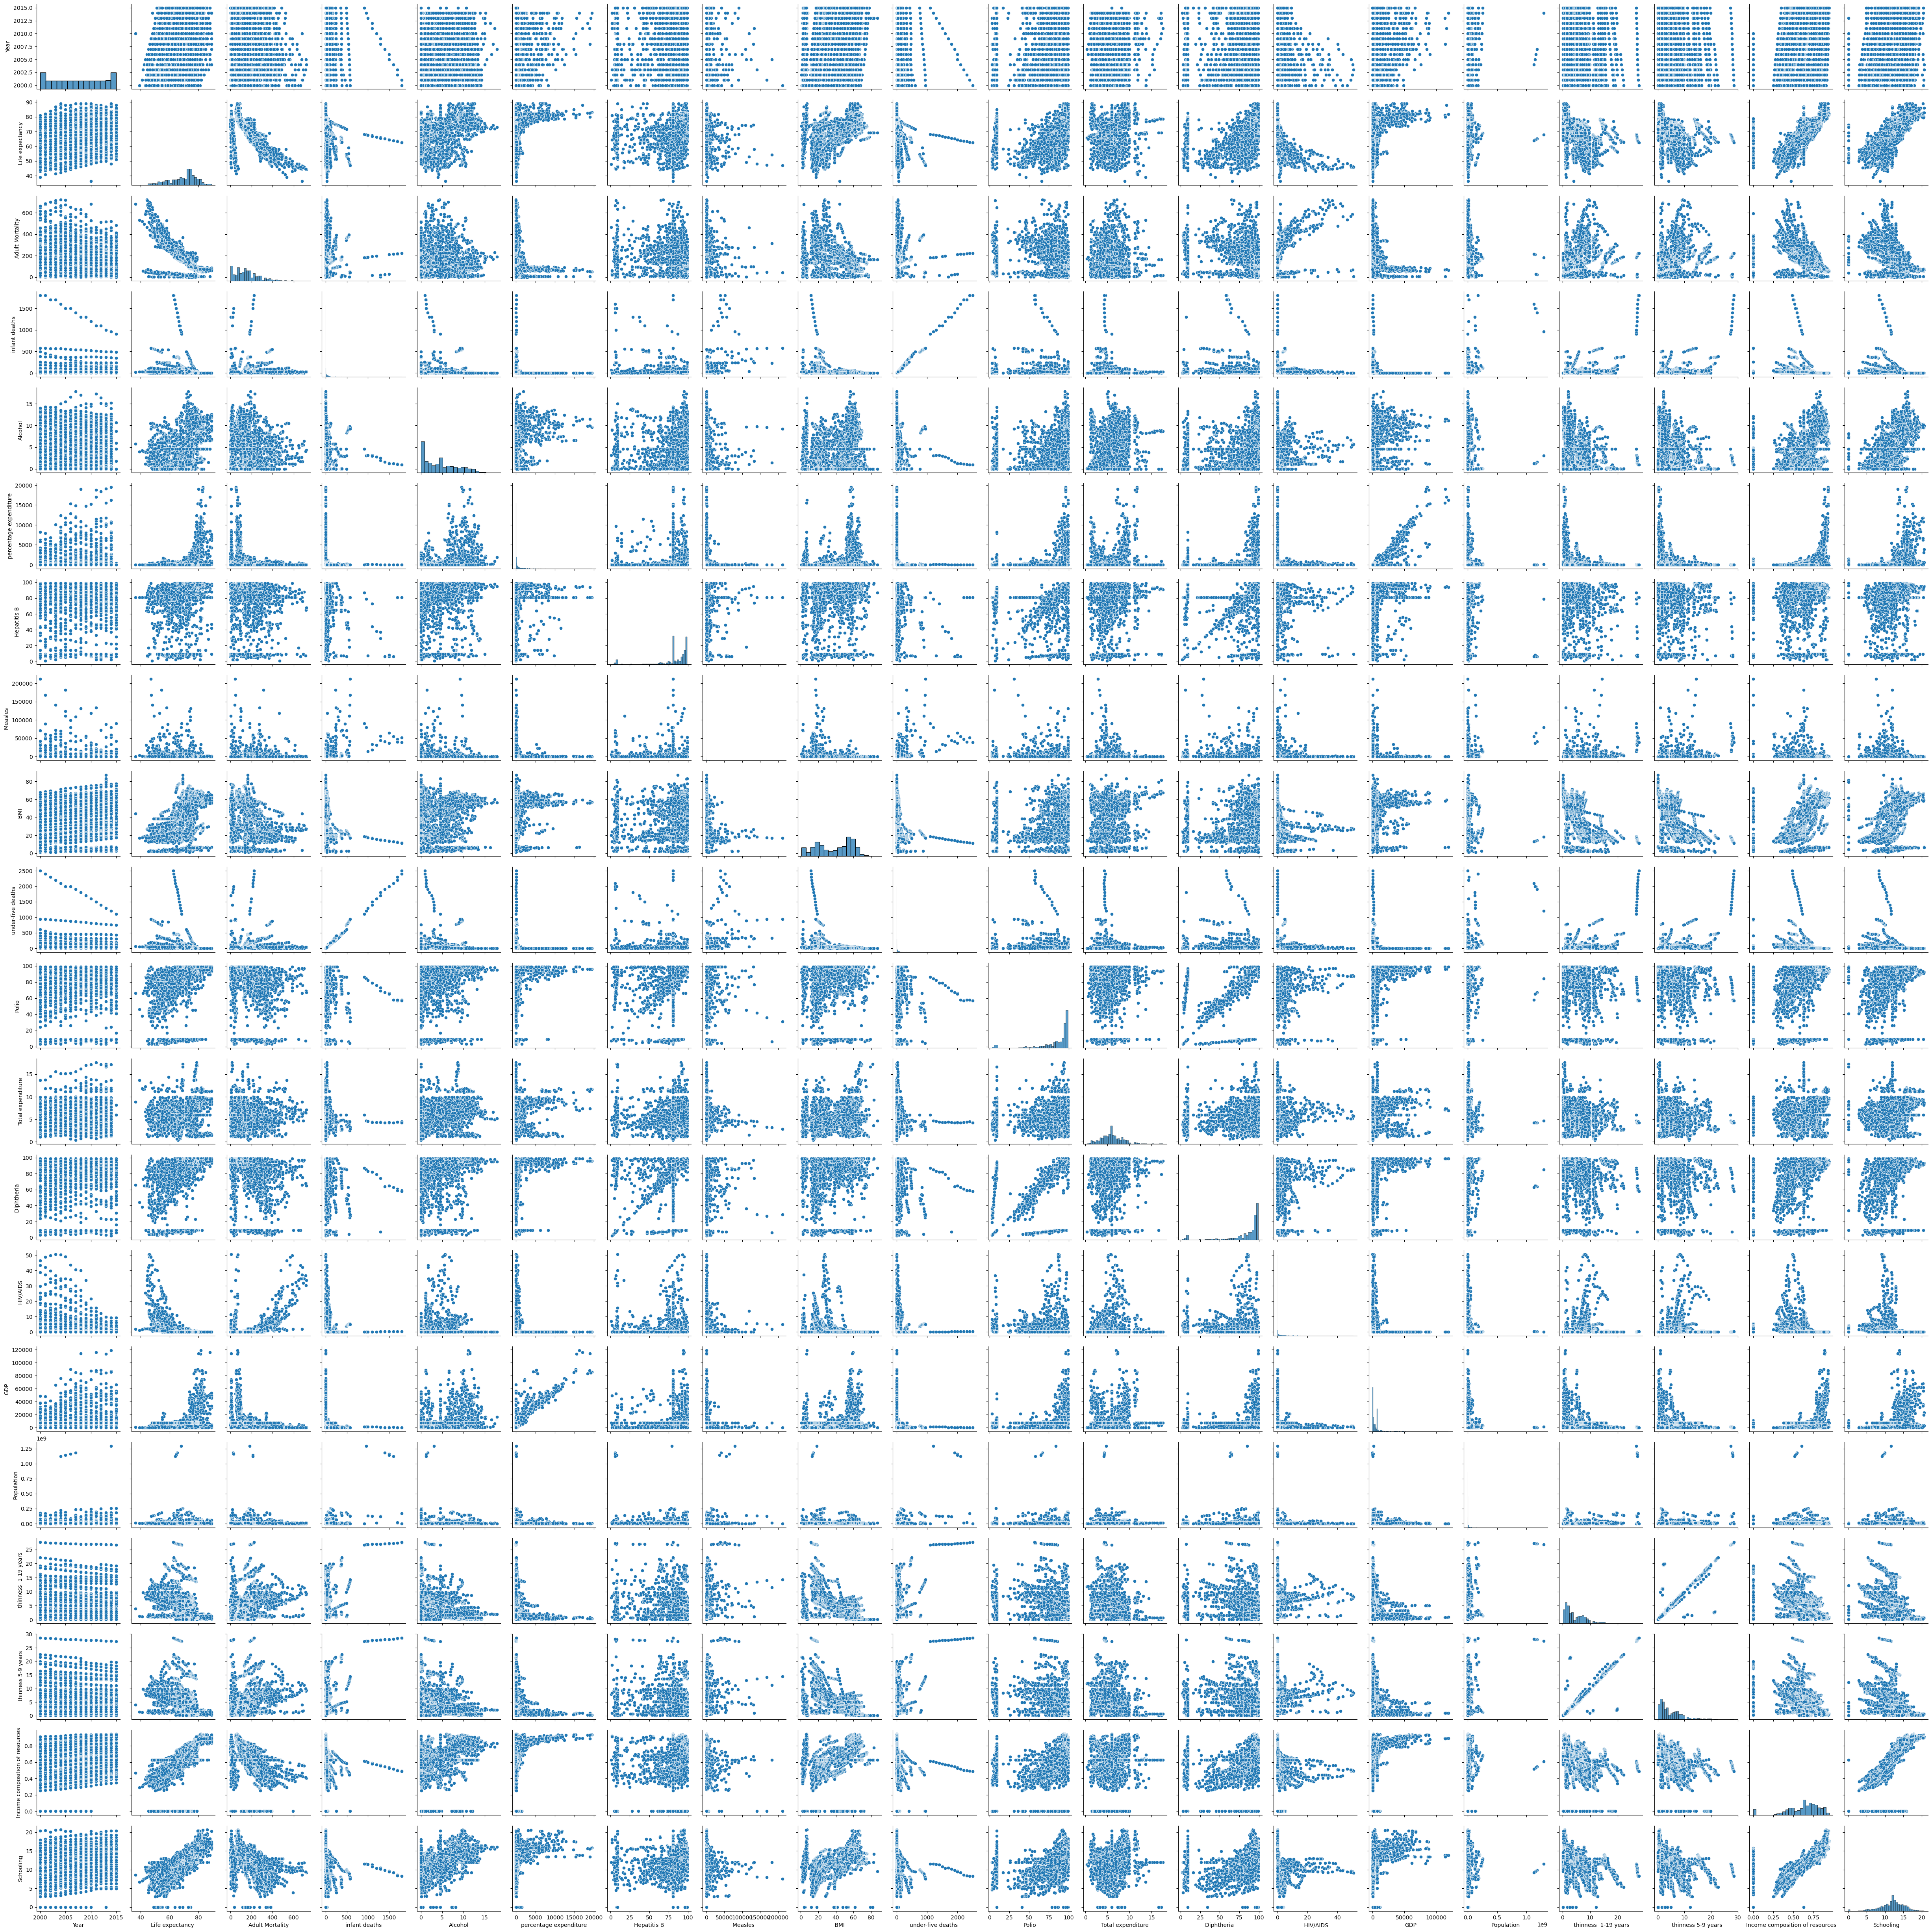

In [16]:
sns.pairplot(data1)

In [19]:
orig_cols = list(data1.columns)
new_cols = []
for col in orig_cols:
    new_cols.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
data1.columns = new_cols

<AxesSubplot:xlabel='life_expectancy', ylabel='Density'>

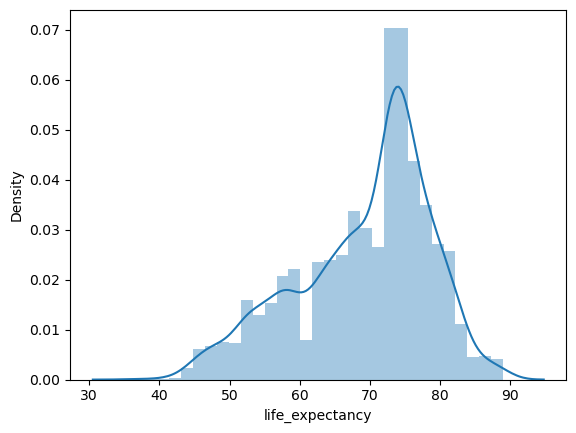

In [20]:
sns.distplot(data1['life_expectancy'])

<AxesSubplot:>

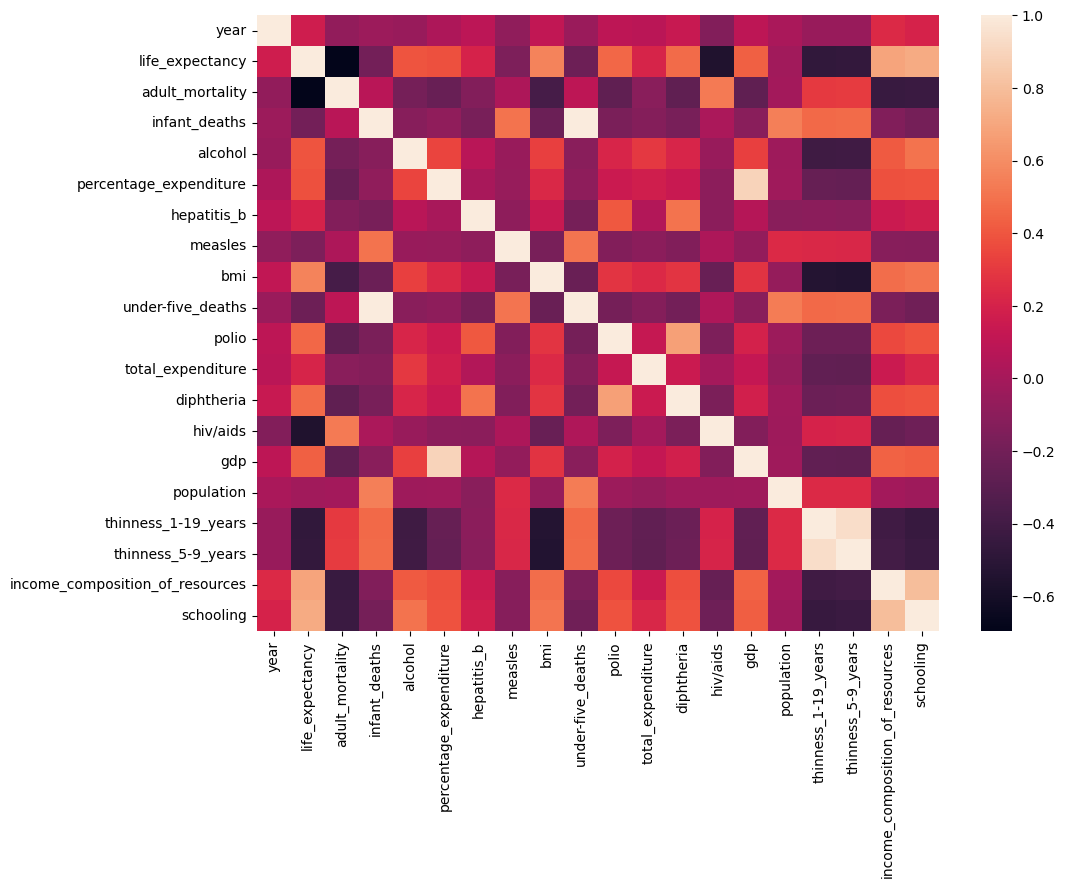

In [21]:
fig, ax=plt.subplots(figsize=(11,8))
sns.heatmap(ax=ax, data=data1.corr())

In [23]:
data1.columns

Index(['year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

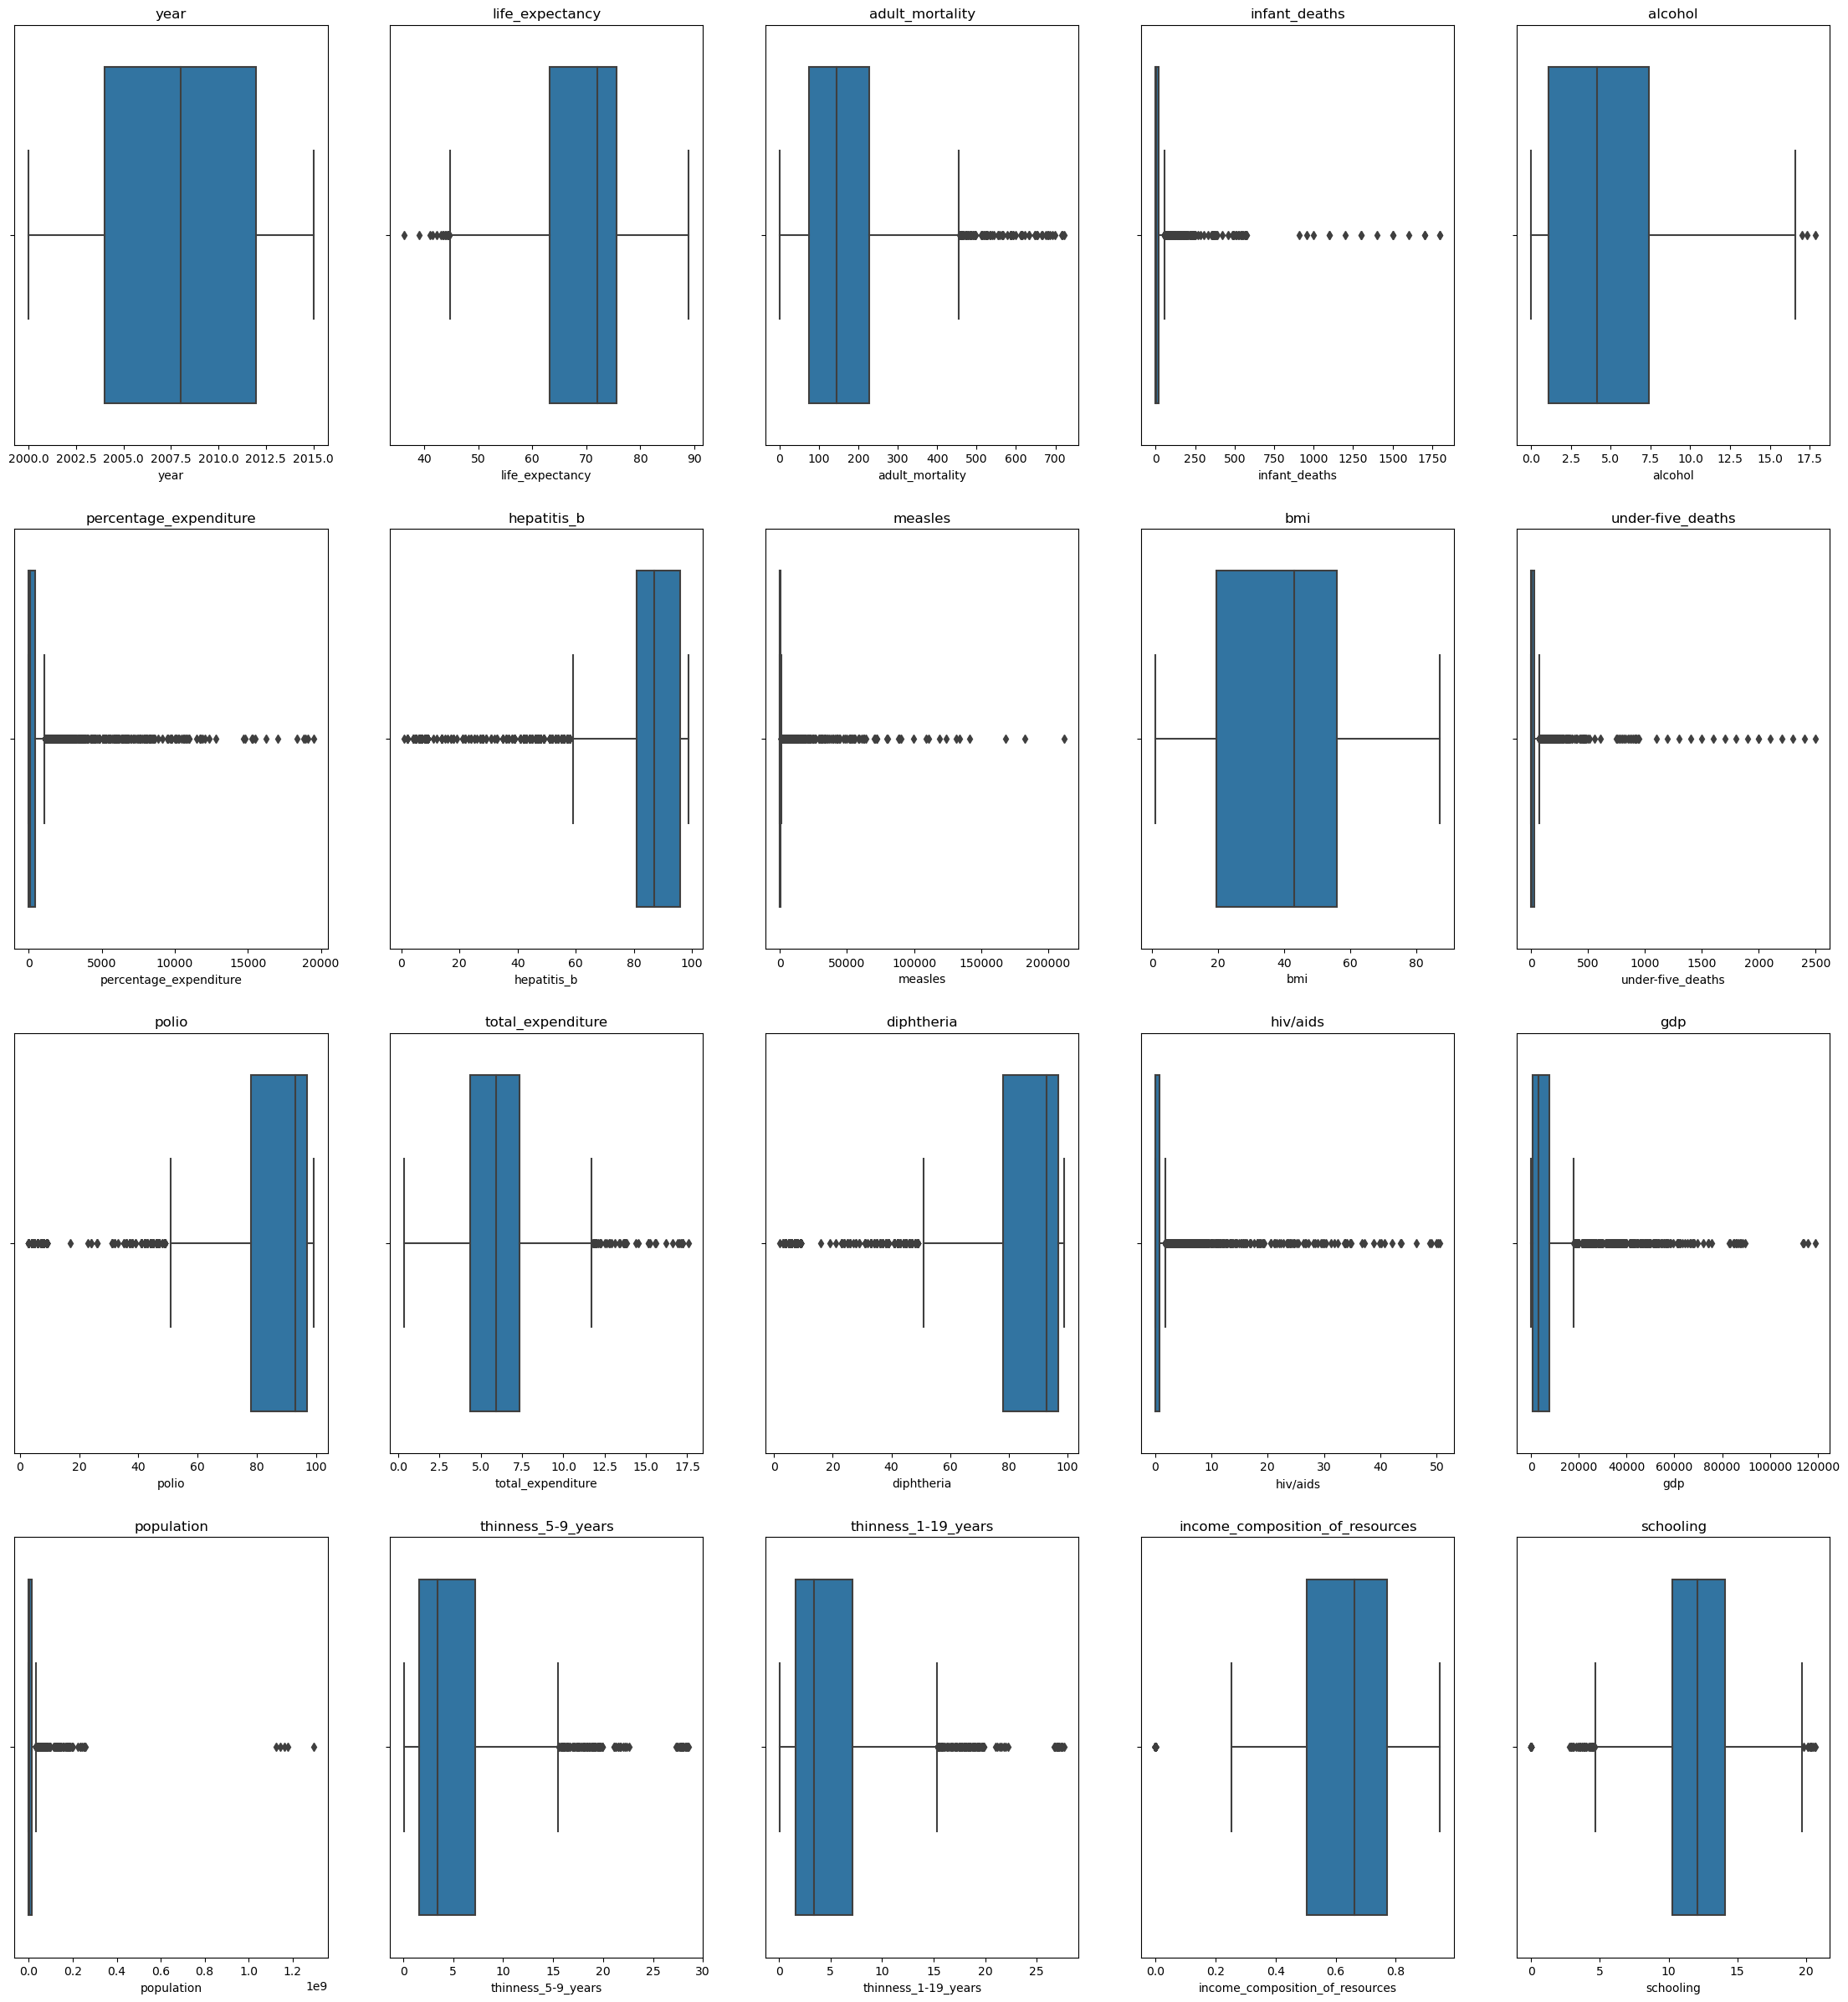

In [24]:
#Box Plots to visualize the outliers
columns = {1: 'year', 2: 'life_expectancy', 3: 'adult_mortality', 4: 'infant_deaths',
        5: 'alcohol' , 6: 'percentage_expenditure', 7: 'hepatitis_b',
       8: 'measles', 9: 'bmi', 10: 'under-five_deaths', 11: 'polio', 12: 'total_expenditure',
       13: 'diphtheria', 14: 'hiv/aids', 15: 'gdp', 16: 'population',
       17: 'thinness_5-9_years', 18: 'thinness_1-19_years',
       19: 'income_composition_of_resources', 20: 'schooling'}

plt.figure(figsize=(28, 30))

for i, column in columns.items():
                     plt.subplot(4,5,i)
                     sns.boxplot(data1[column], orient='v')
                     plt.title(column)

# Training our Regression Models

Let's now begin to train our regression models! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Life Expectancy column.

In [25]:
# Features and target variables

x=data1[['year', 'status',  'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']]
      
y=data1['life_expectancy']

In [26]:
x.head()

year status  adult_mortality  infant_deaths  alcohol  \
0  2015      0            263.0             62     0.01   
1  2014      0            271.0             64     0.01   
2  2013      0            268.0             66     0.01   
3  2012      0            272.0             69     0.01   
4  2011      0            275.0             71     0.01   

   percentage_expenditure  hepatitis_b  measles   bmi  under-five_deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   polio  total_expenditure  diphtheria  hiv/aids         gdp  population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   
3   67.0               8.52        67.0       0.1  669.959000   3696958.0   
4   68.0               7.87        68.0       0.1   63.537231   2978599.0   

   thinness_1-19_years  thinness_5-9_years  income_composition_of_resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   schooling  
0       10.1  
1       10.0  
2        9.9  
3        9.8  
4        9.5

In [27]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: life_expectancy, dtype: float64

# Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [28]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=101)

In [42]:
x_train.shape

(1762, 20)

In [43]:
x_test.shape

(1176, 20)

# Linear Regression Model

Creating and Training the Model

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm=LinearRegression()

In [46]:
lm.fit(x_train,y_train)

LinearRegression()

In [47]:
lm_predictions=lm.predict(x_test)

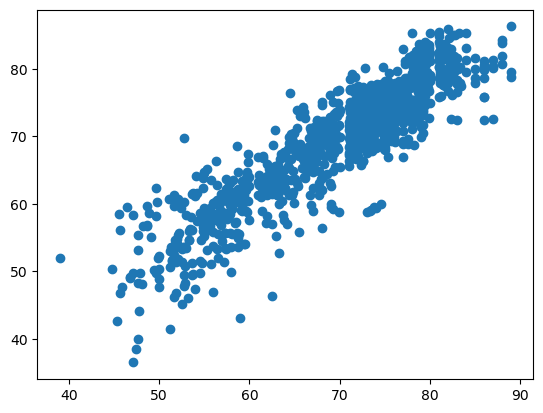

In [48]:
plt.scatter(y_test,lm_predictions)

In [49]:
print(r2_score(lm_predictions,y_test))

0.7742579242503542


In [50]:
print(mean_squared_error(y_test,lm_predictions))

16.27918256440086


In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf=RandomForestRegressor(n_estimators=40,random_state=50)

In [53]:
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=40, random_state=50)

In [54]:
# predictions from the model

rfpredictions=rf.predict(x_test)

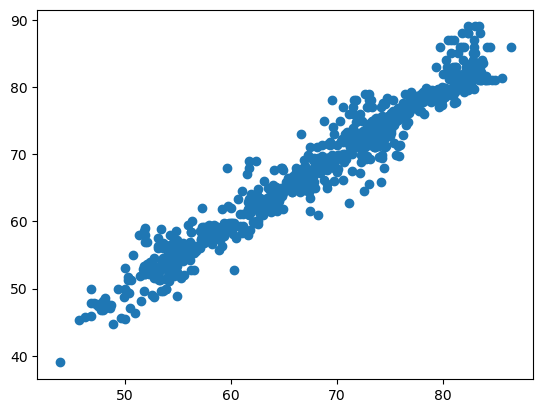

In [55]:
plt.scatter(rfpredictions,y_test)

In [56]:
print(r2_score(y_test,rfpredictions))

0.9550487789418121


In [57]:
print(mean_squared_error(y_test,rfpredictions))

3.7236637857805954


In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
dt=DecisionTreeRegressor(random_state=0)

In [67]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [68]:
dtpredictions=dt.predict(x_test)

In [69]:
print(r2_score(y_test,dtpredictions))

0.9053073662071509


In [70]:
print(mean_squared_error(y_test,dtpredictions))

7.844136887364674


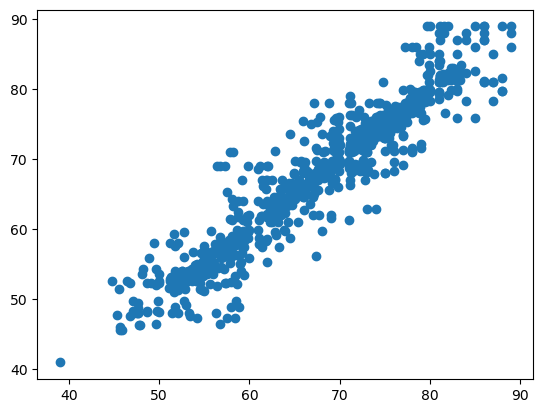

In [71]:
plt.scatter(y_test,dtpredictions)